In [2]:
from qiskit import *

In [3]:
from qiskit.visualization import plot_bloch_multivector

In [4]:
from qiskit.visualization import plot_histogram

In [5]:
#%matplotlib inline

In [6]:
import math

In [7]:
from qiskit_aer import AerSimulator
# Simulador de mediciones (equivalente a qasm_simulator)
qasm_simulator = AerSimulator(method='automatic')

# Simulador de vectores de estado (equivalente a statevector_simulator)
statevector_simulator = AerSimulator(method='statevector')

In [8]:
from qiskit import transpile

In [9]:
def run_on_simulators(circuit):
    # Para obtener el vector de estado necesitamos agregar save_statevector
    circuit_sv = circuit.copy()
    circuit_sv.save_statevector()
    transpiled_statevector = transpile(circuit_sv, basis_gates=statevector_simulator)
    statevector_job = statevector_simulator.run(transpiled_statevector)
    statevector_result = statevector_job.result()
    statevector = statevector_result.get_statevector()

    # Ahora preparamos el circuito para medición
    circuit_qasm = circuit.copy()
    circuit_qasm.measure_all()
    transpiled_qasm = transpile(circuit_qasm, basis_gates=qasm_simulator)
    qasm_job = qasm_simulator.run(transpiled_qasm, shots=1024)
    qasm_result = qasm_job.result()
    counts = qasm_result.get_counts()
    return statevector, counts

In [10]:
circuit = QuantumCircuit(2,2)
statevector, counts = run_on_simulators(circuit)

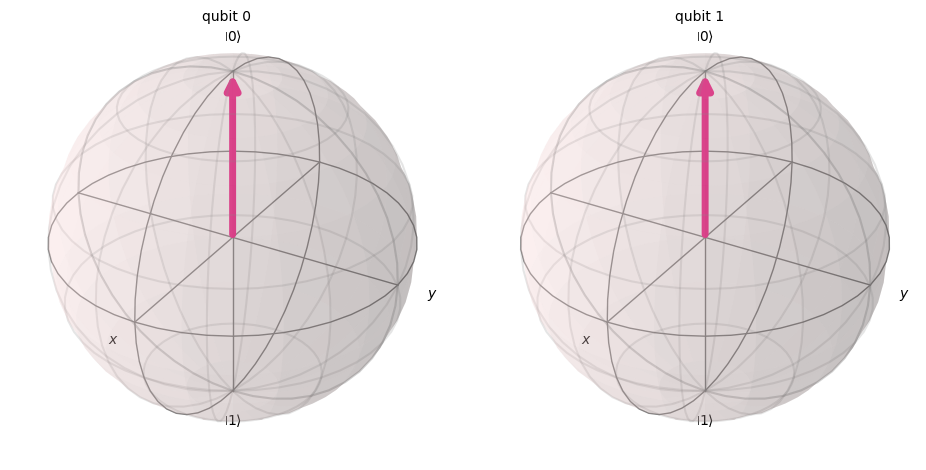

In [11]:
plot_bloch_multivector(statevector)

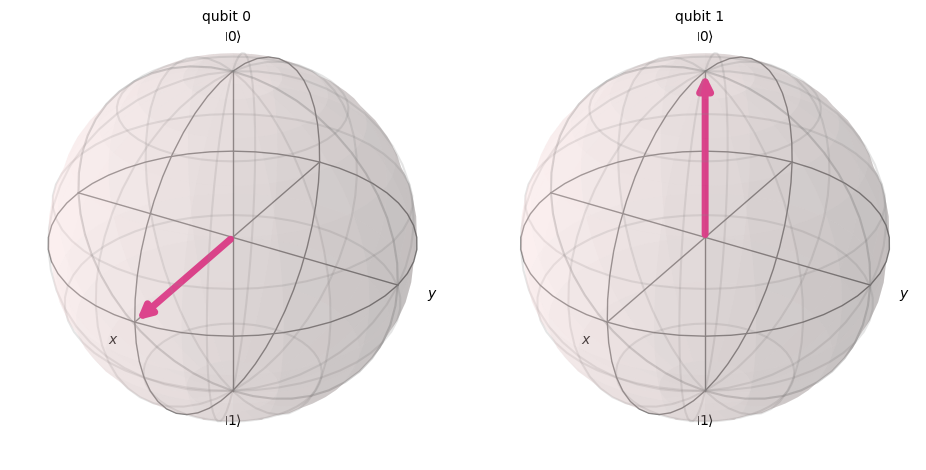

In [12]:
circuit.h(0)
statevector, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevector)

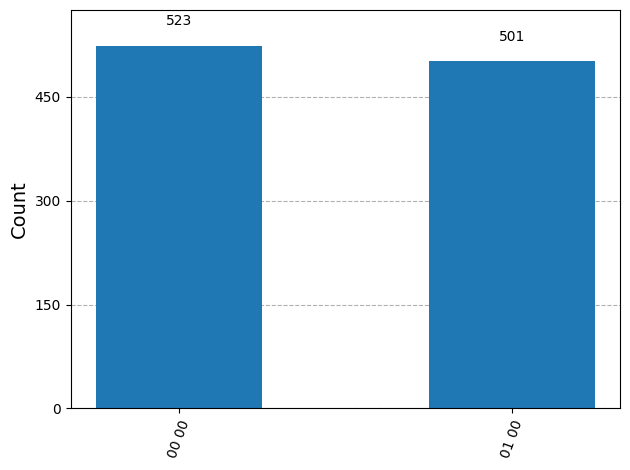

In [13]:
plot_histogram([counts])

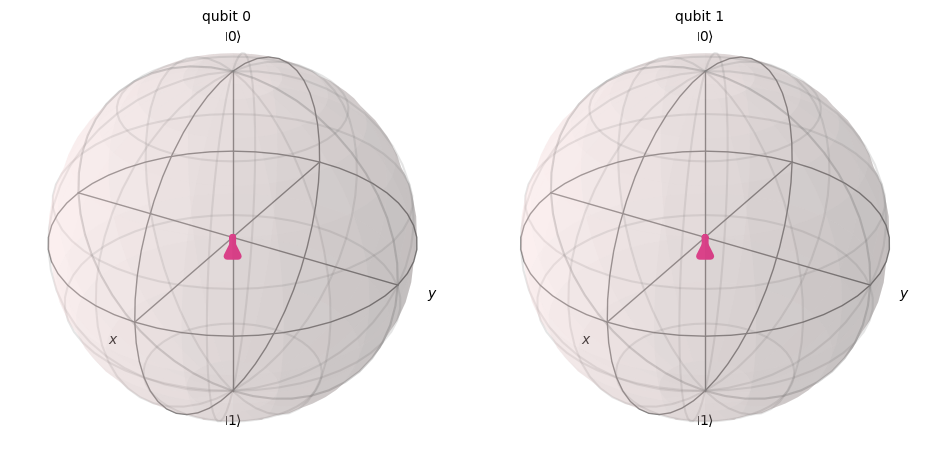

In [14]:
circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)
statevector, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevector)

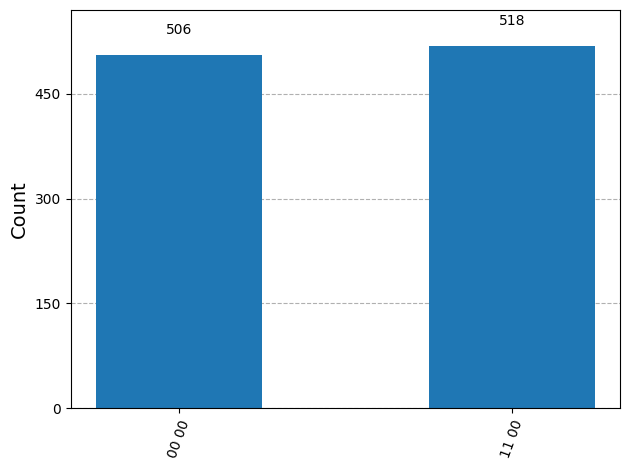

In [15]:
plot_histogram([counts])

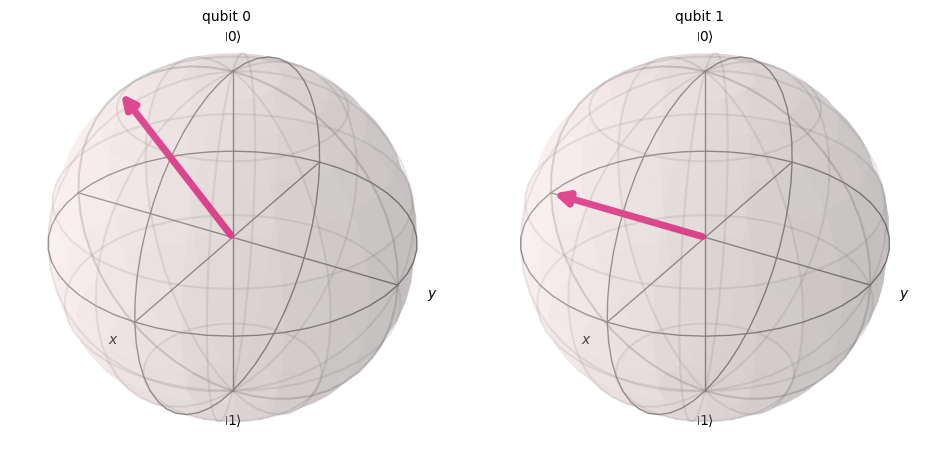

In [16]:
circuit = QuantumCircuit(2,2)
circuit.rx(math.pi/4,0)
circuit.rx(math.pi/2,1)
statevector, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevector)